## Prova 3 - Mineração de dados

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix

# 1. Carregar e Limpar
df = pd.read_csv('breast-cancer.csv')
df = df.replace('?', np.nan)
df.dropna(inplace=True)

# 2. Separar X e y
X = df.drop('Class', axis=1)
y = df['Class']

# Converter tudo para string (garantia para o Encoder)
X = X.astype(str)

# 3. OneHotEncoder (Transformação Binária)
# sparse_output=False cria uma matriz densa (legível)
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
X_encoded = encoder.fit_transform(X)

# Recuperar nomes das colunas novas
feature_names = encoder.get_feature_names_out(X.columns)

# 4. LabelEncoder (Para a Classe Alvo)
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# 5. Split Treino/Teste
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.3, random_state=42)

print("Dados preparados com sucesso!")
print(f"Total de atributos binários gerados: {X_encoded.shape[1]}")

Dados preparados com sucesso!
Total de atributos binários gerados: 41


In [7]:
# --- MODELO 1: NAIVE BAYES (Bernoulli) ---
modelo_nb = BernoulliNB()
modelo_nb.fit(X_train, y_train)
y_pred_nb = modelo_nb.predict(X_test)

print("--- RESULTADOS NAIVE BAYES (Bernoulli) ---")
print(f"Acurácia: {accuracy_score(y_test, y_pred_nb):.2f}")
print("Matriz de Confusão:")
print(confusion_matrix(y_test, y_pred_nb))
print("-" * 30)

# --- MODELO 2: ÁRVORE DE DECISÃO ---
modelo_dt = DecisionTreeClassifier(criterion='entropy', random_state=42)
modelo_dt.fit(X_train, y_train)
y_pred_dt = modelo_dt.predict(X_test)

print("\n--- RESULTADOS ÁRVORE DE DECISÃO ---")
print(f"Acurácia: {accuracy_score(y_test, y_pred_dt):.2f}")
print("Matriz de Confusão:")
print(confusion_matrix(y_test, y_pred_dt))

--- RESULTADOS NAIVE BAYES (Bernoulli) ---
Acurácia: 0.68
Matriz de Confusão:
[[45 13]
 [14 12]]
------------------------------

--- RESULTADOS ÁRVORE DE DECISÃO ---
Acurácia: 0.64
Matriz de Confusão:
[[40 18]
 [12 14]]


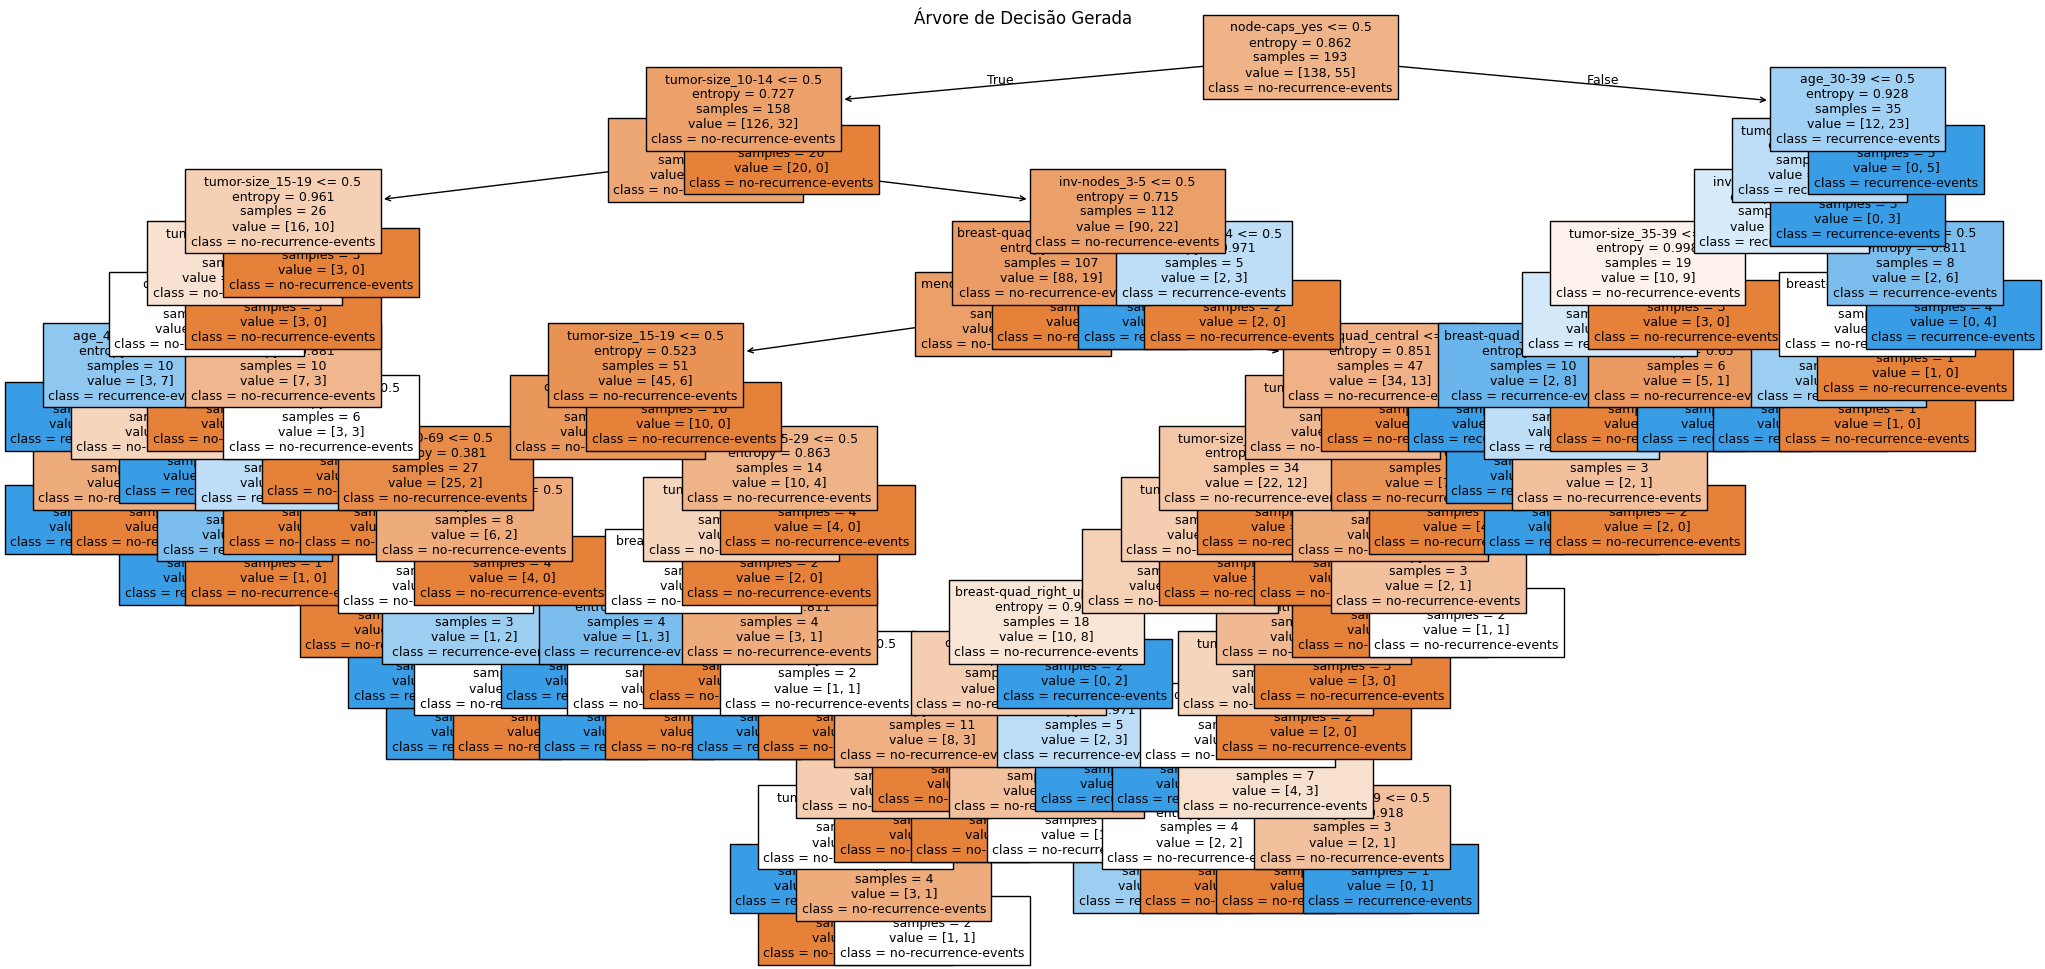

In [8]:
plt.figure(figsize=(25, 12))
plot_tree(modelo_dt, 
          feature_names=feature_names, 
          class_names=le.classes_, 
          filled=True, 
          fontsize=9)
plt.title("Árvore de Decisão Gerada")
plt.show()